## Project: Root Cause of NO-SHOWS for Medical appointments in Brazil
##### What factors are responsible for 30% of patients in Brazil missing their medical Appointments

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


Booking a medical appointments is easy; the hard part is actually showing up for them. This is a report of the investigation carried out in Brazil to show the role of the following factors: **Reminder SMS**, **Age**, and **appointment schedule** in the high record of patients' no shows in medical appointments. This report attempts to provide answers to the following questions:
1.  Do patients miss their appointments due to no reminder SMS recieved?
2.  What age bracket made their appointments more; is age a factor to decide whether or not a patient is likely to miss their appointment
3.  How far is the time between the sceduled date and appointment date for those patients that didnt make their appointment

<a id='wrangling'></a>
## Data Wrangling


### Importing needed packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [11]:
# Loading data 
df = pd.read_csv('No-shows.csv')
#printing out a few lines. 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#Data size
df.shape

(110527, 14)

#### Inspecting Our Data
>First We look out for Nulls as well as patterns in our data

In [13]:
#Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no nulls in our (110527 x 14) data, which is good; but we take a closer look to reveal other patterns that may be useful for our analysis

In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

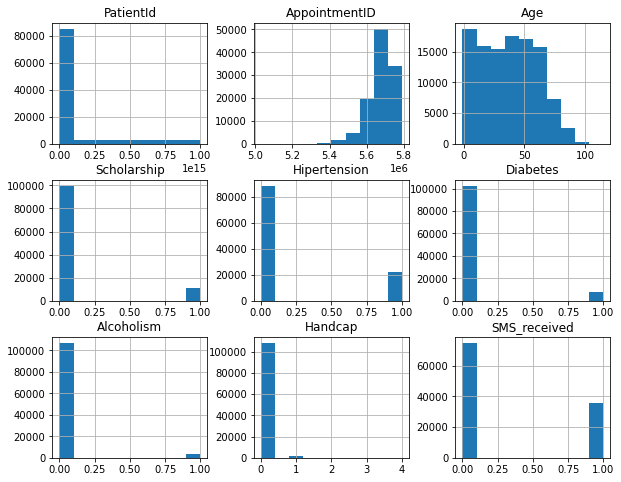

In [15]:
df.hist(figsize=(10, 8))

### Findings
>PatientId and AppointmentID are not very relevant to our study

>The population is fairly young to middle aged, more people between 0-60 years

>Scholarship, Hypertension, Diabetes, Alcoholism, Handicap and SMS_recieved are all skewed to the left.

>SMS_recieved seems to have a strong correlation to No_Show records of 30 percent

>Next to SMS_recieved, Hypertension, Scholarsghip and diabetes seems to be the next factors that have significant correlation to missed appointments

## **Drop Column**
>Next we drop columns we do not need, to make our table a little less complex for analysis:
we would be dropping PatientId and Alcoholism as these has a little to zero effect on the result of our analysis

In [16]:
df.drop(columns=['PatientId', 'Alcoholism'])

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,1,No
110523,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,1,No
110524,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,1,No
110525,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,1,No


### 1.  Analyzing Age
From the describe dataframe, it appears that theres a Age thats less than zero, which is impossible.
We have to find the row and drop it

In [17]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [18]:
df.drop(df.query('Age < 0').index, inplace=True)

To confirm drop

In [19]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [20]:
df.shape

(110526, 14)

#### Dependent Variable (No_show)
>The people that did missed their appointment will be represented as **missed**

>The people that made their appointment will be represented as **showed_up**

In [21]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [22]:
missed = df['No-show'] == 'Yes'
showed_up = df['No-show'] == 'No'


In [23]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [24]:
# How Old are those that missed their appointment
df.Age[missed]

6         23
7         39
11        29
17        40
20        30
          ..
110484    45
110492    33
110496    37
110515    33
110516    37
Name: Age, Length: 22319, dtype: int64

In [25]:
#Mean Age of those who missed their appointment
df.Age[missed].mean()

34.31766656212196

In [26]:
# How Old are those that showed up for their appointment
df.Age[showed_up]

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 88207, dtype: int64

In [27]:
#Mean Age of those who showed up for their appointment
df.Age[showed_up].mean()

37.790504154999034

##### Findings: (Age)
>The Average age of those that missed their appointmennt is smaller than the average age of those that didnt miss theirs.
>Hence we can say that older people are more likely to not miss their appointment

>Next, lets plot the age distribution of those that missed and those that showed up for their appointment

Text(0, 0.5, 'Number of patients')

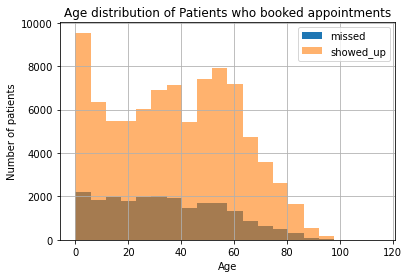

In [28]:
df.Age[missed].hist(alpha=1.0, bins=20, label='missed')
df.Age[showed_up].hist(alpha=0.6, bins=20, label='showed_up')
plt.legend()
plt.title('Age distribution of Patients who booked appointments')
plt.xlabel('Age')
plt.ylabel('Number of patients')

### Conclusion on Age vs No-shows
Younger people are far more likely to miss their appointments than older people

### 2.  Analyzing SMS_recieved

In [29]:
#SMS_recieved status of The patients that missed their appointment
df.SMS_received[missed]


6         0
7         0
11        1
17        0
20        0
         ..
110484    0
110492    0
110496    0
110515    0
110516    0
Name: SMS_received, Length: 22319, dtype: int64

<AxesSubplot:>

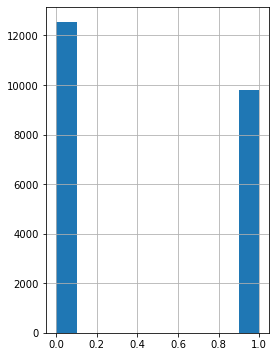

In [30]:
#visualizing this SMS_recieved status
df.SMS_received[missed].hist(figsize=(4, 6))


In [31]:
#SMS_recieved status of The patients that showed up for their appointment
df.SMS_received[showed_up]

0         0
1         0
2         0
3         0
4         0
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: SMS_received, Length: 88207, dtype: int64

<AxesSubplot:>

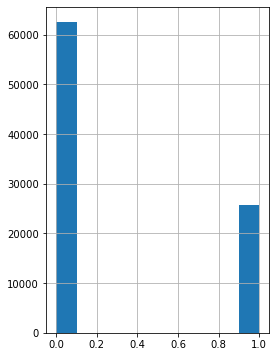

In [32]:
#visualizing this SMS_recieved status
df.SMS_received[showed_up].hist(figsize=(4, 6))

>Among the people that recieved sms (1): Some showed up and some didnt 

>Also, among the people that didn't recieve sms (0): Some showed up and some didnt 

>Lets show these stats in number and a more comparative viz

In [33]:
df.groupby('SMS_received')['No-show'].value_counts().unstack()

No-show,No,Yes
SMS_received,,
0,62509,12535
1,25698,9784


In [35]:
def VariablePlotPercent(df,xyz):
    
    ax = df.groupby(xyz)['No-show'].value_counts().unstack(xyz).plot(kind= 'pie', subplots=True, figsize=(10,5), explode=[0,0.1], autopct='%1.2f%%');
    ax[0].set_title('Percentage Show/No Show: Did not recieve SMS', weight='bold')
    ax[1].set_title('Percentage Show/No Show: Recieved SMS', weight='bold');

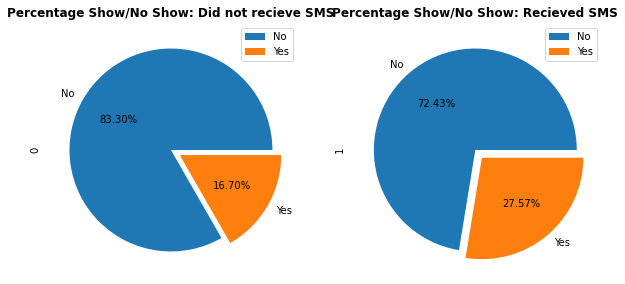

In [37]:
VariablePlotPercent(df,'SMS_received')

Among people who did not recieve SMS, 83% showed up and 17% missed their appointments
>Based on this, we can say that SMS is not exactly a factor to decide whether or not a patient makes their medical appointment

Among people who recieved SMS, 72% showed up and 28% missed their appointments
>Based on this, we can also say that SMS is not a strong determining factor for patients making their medical appointment

### Booking/Appointment Dates

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

In [ ]:
type(df['AppointmentDay'][0])

datetime.date

In [ ]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
df['Number_of_days']=((df.AppointmentDay-df.ScheduledDay)/np.timedelta64(1, 'D'))
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Number_of_days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Number of patients')

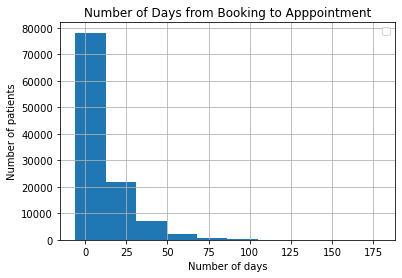

In [ ]:
df.Number_of_days.hist()
plt.legend()
plt.title('Number of Days from Booking to Apppointment')
plt.xlabel('Number of days')
plt.ylabel('Number of patients')


> More people booked for an appointment for same day as booking date

>Less people booked appointments on a far date from boking date

>This could explain why people missed their appointment

df.groupby('Number_of_days')['No_show'].value_counts().unstack()

In [ ]:
dh=df.groupby('No-show')['Number_of_days'].value_counts().unstack()
dh.head()

Number_of_days,-6.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,133.0,139.0,142.0,146.0,151.0,155.0,162.0,169.0,176.0,179.0
No-show,,,,,,,,,,,,,,,,,,,,,
No,NaN,NaN,36770.0,4100.0,5123.0,2093.0,4059.0,2405.0,3036.0,3597.0,...,7.0,NaN,5.0,NaN,NaN,4.0,9.0,7.0,10.0,8.0
Yes,1.0,4.0,1792.0,1113.0,1602.0,644.0,1231.0,872.0,1001.0,1309.0,...,4.0,1.0,3.0,1.0,1.0,6.0,2.0,1.0,6.0,2.0


From observation, The lesser the days between Schedule and appointment dates, the higher the chances of making appointment. This can help to restrict patients from making appointments for some time far into the future.

### Limitations of The study:
The data collected, although enough to draw some conclusions on the study, it lacks the numeracy for comprehensive quantitative analysis. The data is mostly qualitative in nature (zeros and ones) which limits the amount of wrangling that we are able to do to arrive at conclusions.

### Conclusion
We can deduce the following from our analysis:

> Reminder SMS is not a factor that decides whether or not a patient shows up for their appointment: 

>Younger people are more likely to miss their appointment than the aged.

>Patients are more likely to make appointments that are close to the date they booked it. This could be due to the issue around remembering